In [1]:
import pandas as pd
import main
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/Users/willponczak/Desktop/QC2025/data/all_months_1day.csv', sep=',')

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_47623/3676395883.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/willponczak/Desktop/QC2025/data/all_months_1day.csv', sep=',')


In [5]:
df.columns

Index(['shipid', 'date_time_utc', 'flagname', 'iceclass', 'astd_cat',
       'sizegroup_gt', 'fuelquality', 'fuelcons', 'co', 'co2', 'so2', 'pm',
       'nox', 'n2o', 'nmvoc', 'ch4', 'blackcarbon', 'organiccarbon',
       'oilbilgewater', 'blackwater', 'greywater', 'garbage', 'dist_nextpoint',
       'sec_nextpoint', 'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

In [25]:
df.shipid.value_counts()[500]

4589

In [28]:
df_s = df[df.shipid == 4589].dropna()

In [7]:
track_table = main.build_track_table(df)

Missing column: lat


In [15]:
track_table

,month,segment_id,track_id


In [8]:
df_big_with_tracks = df.merge(track_table, left_on='shipid', right_on='segment_id', how='left')


In [31]:
import cartopy

In [32]:
import matplotlib.pyplot as plt

In [42]:
import geopandas as gpd

In [48]:
gdf_s = gpd.GeoDataFrame(data=df_s, geometry=gpd.points_from_xy(x=df_s.longitude, y=df_s.latitude), crs=cartopy.crs.PlateCarree())

In [49]:
from shapely.geometry import LineString

gdf_s = gdf_s.sort_values(by=['shipid', 'date_time_utc'])


In [50]:

lines = (
    gdf_s.groupby('shipid')['geometry']
    .apply(lambda x: LineString(x.tolist()))
    .reset_index()
)


In [54]:

# Convert to a GeoDataFrame
lines_gdf = gpd.GeoDataFrame(lines, geometry='geometry', crs=gdf_s.crs)


In [56]:
lines_gdf

,shipid,geometry
0,4589,"LINESTRING (4.198 62.004, 4.231 62.021, 4.265 ..."


In [ ]:
df_s.longitude.min(), df_s.longitude.max()


(4.197778, 13.067311)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_47623/843529459.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


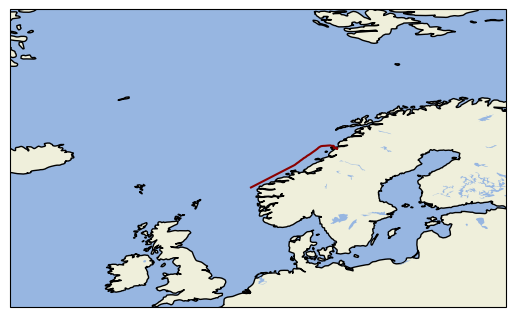

In [66]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': cartopy.crs.PlateCarree()})

# ax.plot(df_s['longitude'], df_s['latitude'])
# gdf_s.plot(ax=ax)
lines_gdf.plot(ax=ax, color='darkred')

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


ax.set_xlim(-20, 30)
ax.set_ylim(50, 80)

fig.show()

In [14]:
# Sort to ensure LineStrings are in time order
df_big_with_tracks = df_big_with_tracks.sort_values(by=['track_id', 'date_time_utc'])

# Create LineStrings per track
lines = (
    df_big_with_tracks.groupby('track_id')
    .apply(lambda x: LineString(zip(x['longitude'].values, x['latitude'].values)), include_groups=False)
    .reset_index()
)

# Rename the geometry column
lines.columns = ['track_id', 'geometry']

# Convert to GeoDataFrame
gdf_tracks = gpd.GeoDataFrame(lines, geometry='geometry')
gdf_tracks.set_crs(epsg=4326, inplace=True)

# Plot
gdf_tracks.plot(figsize=(12, 8), linewidth=1, color='blue')
plt.title("Ship Tracks")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

ValueError: Length mismatch: Expected axis has 32 elements, new values have 2 elements